# Neural Network Algorithm

In the following steps we will develop and optimize a TensorFlow based neural network. This code is based on the assignments from the Udacity 'Deep Learning' course.

In [1]:
# matlotlib inline plotting
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from IPython.display import display

from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score

# Load dataset

In [13]:
dataset = pd.read_csv("data/curated_dataset.csv", sep="\t", header=0, index_col = 0)
print ("Number of data points:", len(dataset))

Number of data points: 2678


In [14]:
display(dataset)

,Days_Since_Open,Break_Coming,Overnight_Return,Overnight_VIX,O2O,1d_Ret,2d_Ret,3d_Ret,4d_Ret,5d_Ret,...,126d_Ret,189d_Ret,252d_Ret,1d_VIX,5d_VIX,1d_Rel_Vol,5d_Rel_Vol,1d_PtT,1d_VIX_PtT,Intraday_Increase
0,1.0,0,-0.001138,0.011299,0.003261,0.005296,0.011775,0.003086,-0.002669,0.003814,...,0.054196,0.044752,0.152477,-0.054198,-0.068421,0.150982,-0.002956,0.009513,0.105180,0
1,1.0,0,0.000889,-0.015267,0.007367,0.006444,-0.002199,-0.007923,-0.001475,0.009426,...,0.046503,0.050294,0.147818,-0.096552,-0.177136,-0.003421,-0.000493,0.009094,0.135299,1
2,1.0,0,-0.000028,-0.078621,-0.005791,-0.008588,-0.014275,-0.007868,0.002963,0.003263,...,0.044326,0.041296,0.111197,0.179821,-0.066323,-0.062535,-0.016959,0.006272,0.098703,1
3,3.0,0,-0.002841,0.078926,-0.006787,-0.005737,0.000726,0.011651,0.011954,0.011935,...,0.062659,0.048637,0.120301,0.022463,-0.200390,-0.022102,-0.021904,0.004509,0.053520,0
4,1.0,1,-0.001787,-0.001664,0.001082,0.006500,0.017488,0.017792,0.017773,0.013934,...,0.069373,0.067784,0.122976,-0.096241,-0.262577,-0.054481,0.101086,0.004163,0.128296,0
5,1.0,0,0.003615,0.006767,0.012291,0.010917,0.011220,0.011201,0.007386,0.017570,...,0.062066,0.070242,0.113438,-0.164573,-0.266814,0.010656,0.093209,0.011858,0.188227,1
6,1.0,0,0.002253,-0.053392,-0.000634,0.000299,0.000280,-0.003493,0.006581,0.005990,...,0.043887,0.066919,0.087846,0.025113,-0.108123,-0.174317,0.099463,0.005427,0.090615,1
7,1.0,0,0.003188,-0.035415,0.000910,-0.000019,-0.003791,0.006280,0.005689,-0.009226,...,0.042659,0.047618,0.092486,0.010410,0.024406,-0.218716,0.178595,0.008265,0.088686,0
8,3.0,0,0.002258,-0.014964,-0.001160,-0.003772,0.006299,0.005708,-0.009208,0.005334,...,0.043707,0.031880,0.074847,-0.057055,-0.121714,0.320440,0.240760,0.007131,0.114537,0
9,1.0,1,-0.000363,0.006748,0.009937,0.010109,0.009516,-0.005456,0.009141,-0.015605,...,0.052274,0.050822,0.076154,-0.101433,0.302958,-0.159209,0.210159,0.013551,0.135979,0


# split features and labels:

In [16]:
X = dataset.drop('Intraday_Increase', axis=1)
y = pd.DataFrame(dataset['Intraday_Increase'])

# Summarize the label data
display(y.describe())

,Intraday_Increase
count,2678.000000
mean,0.547050
std,0.497874
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [17]:
# Scale features (mean = 0, stdev = 1):
X_scaled = preprocessing.scale(X)

In [19]:
# 1-hot encoding on labels (y):
enc = OneHotEncoder()
enc.fit(y)
y_scaled = enc.transform(y).toarray()

y_insight = pd.DataFrame(y_scaled)

display(y_insight.describe())

y_scaled.shape

,0,1
count,2678.000000,2678.000000
mean,0.452950,0.547050
std,0.497874,0.497874
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


(2678, 2)

Split the data into train, validation and test sets: Shuffling will not be used because test data should be drawn from the latest data points, to remove any risk of the learning algorithms glimpsing the future

In [21]:
train_dataset = X_scaled[756:]
valid_dataset = X_scaled[252:756]
test_dataset = X_scaled[:252]

train_labels = y_scaled[756:]
valid_labels = y_scaled[252:756]
test_labels = y_scaled[:252]

tf.cast(train_dataset, tf.float32)
tf.cast(valid_dataset, tf.float32)
tf.cast(test_dataset, tf.float32)

tf.cast(train_labels, tf.float32)
tf.cast(valid_labels, tf.float32)
tf.cast(test_labels, tf.float32)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

describe_train = pd.DataFrame(train_dataset)
describe_valid = pd.DataFrame(valid_dataset)
describe_test = pd.DataFrame(test_dataset)

describe_train_labels = pd.DataFrame(train_labels)
describe_valid_labels = pd.DataFrame(valid_labels)
describe_test_labels = pd.DataFrame(test_labels)


#display(describe_train.describe())
#display(describe_valid.describe())
#display(describe_test.describe())

#display(describe_train_labels.describe())
#display(describe_valid_labels.describe())
#display(describe_test_labels.describe())

Training set (1922, 21) (1922, 2)
Validation set (504, 21) (504, 2)
Test set (252, 21) (252, 2)


#### Metrics

Accuracy and F1 Score

In [23]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

def F1_score(predictions, labels):
  return f1_score(np.argmax(labels, 1), np.argmax(predictions, 1))

#### Create TensorFlow graph

In [24]:
batch_size = 1921
num_labels = 2
num_features = 21

# Add second and third hidden layer, each with fewer nodes:

num_nodes1 = 16
num_nodes2 = 8
num_nodes3 = 4

In [25]:
graph = tf.Graph()
with graph.as_default():

  tf.set_random_seed(8)

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, num_features))
    
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  
  tf_valid_dataset = tf.constant(valid_dataset,tf.float32)
  tf_test_dataset = tf.constant(test_dataset,tf.float32)
  
  # Variables.
  weights_1 = tf.Variable(tf.truncated_normal([num_features, num_nodes1],stddev=0.22))
  biases_1 = tf.Variable(tf.zeros([num_nodes1]))
  
  weights_2 = tf.Variable(tf.truncated_normal([num_nodes1, num_nodes2],stddev=0.32))
  biases_2 = tf.Variable(tf.zeros([num_nodes2]))

  weights_3 = tf.Variable(tf.truncated_normal([num_nodes2, num_nodes3],stddev=0.45))
  biases_3 = tf.Variable(tf.zeros([num_nodes3]))

  weights_4 = tf.Variable(tf.truncated_normal([num_nodes3, num_labels],stddev=0.71))
  biases_4 = tf.Variable(tf.zeros([num_labels]))

  # Training computation - Layer 1
  hidden1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)
  
  # Adding Dropout - Layer 1
  keep_prob1 = tf.placeholder(tf.float32)
  hidden1_drop = tf.nn.dropout(hidden1,keep_prob1)
    
  # Training computation - Layer 2
  hidden2 = tf.nn.relu(tf.matmul(hidden1_drop, weights_2) + biases_2)
  
  # Adding Dropout - Layer 2
  keep_prob2 = tf.placeholder(tf.float32)
  hidden2_drop = tf.nn.dropout(hidden2,keep_prob2)
    
  # Training computation - Layer 3 
  hidden3 = tf.nn.relu(tf.matmul(hidden2_drop, weights_3) + biases_3)
  
  # Adding Dropout - Layer 3
  keep_prob3 = tf.placeholder(tf.float32)
  hidden3_drop = tf.nn.dropout(hidden3,keep_prob3)
    
  logits = tf.matmul(hidden3_drop, weights_4) + biases_4
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = tf_train_labels))
    
  # L2 regularization for the fully connected parameters.
  regularizers = (tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(biases_1) +
                  tf.nn.l2_loss(weights_2) + tf.nn.l2_loss(biases_2) +
                  tf.nn.l2_loss(weights_3) + tf.nn.l2_loss(biases_3) +
                  tf.nn.l2_loss(weights_4) + tf.nn.l2_loss(biases_4))
    
  # Add the regularization term to the loss.
  loss += 1e-6 * regularizers    
  
  # Optimizer - Add learning rate decay
  global_step = tf.Variable(0)  # count the number of steps taken.
  learning_rate = tf.train.exponential_decay(
        0.05, global_step, 100000, 0.98, staircase=True)
    
  optimizer = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  
  valid_prediction = tf.nn.softmax(
        tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1)+
                                                                       biases_1), weights_2)+ biases_2), weights_3)
                             + biases_3), weights_4)+ biases_4)

  test_prediction = tf.nn.softmax(
        tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_1)+
                                                                       biases_1), weights_2)+ biases_2), weights_3)
                             + biases_3), weights_4)+ biases_4)

#### Train & Predict

In [30]:
num_steps = 10001

# Set train_batches to 8 to use the full training set
train_batches = 1
train_subset = train_batches * batch_size

print('Training set restricted to the following number of samples:',train_subset)

train_smallset = train_dataset[0:train_subset,:]
train_smalllabel = train_labels[0:train_subset]

print('Training set', train_smallset.shape, train_smalllabel.shape)

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()

  print("Initialized")
    
  step_counter = []
  step_train_accuracy = []
  step_valid_accuracy = []
  step_test_accuracy = []
    
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
#    offset = (step * batch_size) % (train_smalllabel.shape[0] - batch_size)
    offset = 0

    # Generate a minibatch.
    batch_data = train_smallset[offset:(offset + batch_size), :]
    batch_labels = train_smalllabel[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels,keep_prob1: 0.95,
                 keep_prob2:0.95,keep_prob3:0.95}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
      print("Test accuracy: %.2f%%" % accuracy(test_prediction.eval(), test_labels))   
      print ("F1 Score: %f" % F1_score(test_prediction.eval(), test_labels))
      
      step_counter.append(step)
      step_train_accuracy.append(accuracy(predictions, batch_labels))
      step_valid_accuracy.append(accuracy(valid_prediction.eval(), valid_labels))
      step_test_accuracy.append(accuracy(test_prediction.eval(), test_labels))
    
  print('\n')
  print("FINAL Test accuracy: %.2f%%" % accuracy(test_prediction.eval(), test_labels))   
  print ("FINAL F1 Score: %f" % F1_score(test_prediction.eval(), test_labels))

  saver = tf.train.Saver()
  saver.save(session, 'data/NN.model')
  
  np.savetxt("data/eval-NN.csv", test_prediction.eval(), delimiter=",")

Training set restricted to the following number of samples: 1921
Training set (1921, 21) (1921, 2)
Initialized
Minibatch loss at step 0: 0.701603
Minibatch accuracy: 53.2%
Validation accuracy: 52.4%
Test accuracy: 52.78%
F1 Score: 0.690909
Minibatch loss at step 500: 0.666171
Minibatch accuracy: 59.8%
Validation accuracy: 57.9%
Test accuracy: 58.73%
F1 Score: 0.695906
Minibatch loss at step 1000: 0.642354
Minibatch accuracy: 64.3%
Validation accuracy: 61.9%
Test accuracy: 62.30%
F1 Score: 0.677966
Minibatch loss at step 1500: 0.640639
Minibatch accuracy: 63.6%
Validation accuracy: 62.9%
Test accuracy: 63.89%
F1 Score: 0.689420
Minibatch loss at step 2000: 0.631733
Minibatch accuracy: 64.2%
Validation accuracy: 63.7%
Test accuracy: 63.10%
F1 Score: 0.682594
Minibatch loss at step 2500: 0.621189
Minibatch accuracy: 65.5%
Validation accuracy: 63.3%
Test accuracy: 63.89%
F1 Score: 0.678445
Minibatch loss at step 3000: 0.606341
Minibatch accuracy: 66.5%
Validation accuracy: 63.5%
Test accur

#### Visualize performance

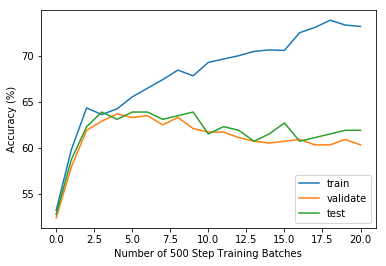

In [27]:
plt.plot(step_train_accuracy, label = 'train')
plt.plot(step_valid_accuracy, label = 'validate')
plt.plot(step_test_accuracy, label = 'test')
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of 500 Step Training Batches')
plt.legend(loc=4)